## Aprendizaje Profundo para el Análisis de Imágenes
## Grados en Telecomunicación - Universidad Carlos III de Madrid
# PRÁCTICA 1: Procesado de imagen con Python y primeros pasos en PyTorch

<center><img src='https://www.uc3m.es/ss/Satellite?blobcol=urldata&blobkey=id&blobtable=MungoBlobs&blobwhere=1371614316787&ssbinary=true' width=400 /></center>

## Introducción

En esta práctica el estudiantado se familiarizará con dos librerías indispensables en esta asignatura:
- La librería scikit-image: que proporciona funciones y métodos para el procesado de imágenes en Python.
- La toolbox PyTorch: un framework de trabajo para el prototipado y desarrollo de soluciones de aprendizaje automático, con especial énfasis en las redes neuronales profundas.
    

## Antes de empezar

Antes de empezar, necesita configurar algunas cosas en caso de que vaya a utilizar Google Colab. En particular, necesita subir la carpeta que contiene las imágenes de trabajo y cambiar el directorio de trabajo al correspondiente. Para ello, suba la carpeta con la práctica que va a ejecutar (incluyendo la carpeta images) y ejecute el siguiente código:

In [2]:
#Descomenta únicamente si quieres ejecutar este código en Google Colab
#from google.colab import drive
#import os, sys
#images_dir = '/content/drive/My Drive/APAI_P1/'
#drive.mount('/content/drive')
#print(os.getcwd())
#os.chdir(images_dir) #Here put the full path to the folder where you have the images

In [3]:
#os.listdir(images_dir)

Además, si quiere ejecutar el código con soporte a GPU (para el último módulo de la práctica), en Google Colab vaya a `Entorno de ejecución->Cambiar tipo entorno de ejecución` y seleccione GPU en `acelerador por hardware`

## Parte A: Procesado de imagen con scikit-image

Toda la documentación de la librería `scikit-image` puede consultarse en https://scikit-image.org/. Esta librería permite procesar imágenes a través de arrays nativos de numpy. La API se subdivide en ciertos submódulos, como se detalla en la [documentacion](https://scikit-image.org/docs/stable/api/api.html). Puedes importar la librería o algunos de los submódulos (color) como sigue:


In [4]:
import skimage
from skimage import color
import numpy as np

### Lectura/escritura de imágenes

El submódulo io se encarga de la lectura/escritura de imágenes. La función `imread`, nos permite leer una imagen y nos devuelve un array de numpy, con lo que fácilmente podemos calcular sus dimensiones:

In [5]:
import skimage.io as io #IMportamos el submódulo io
im=io.imread('images/car.jpg') #Leemos la imagen
dim=im.shape
print(dim) #Mostramos sus dimensiones como Height x Width x Color Channels

(768, 1024, 3)


También podemos mostrar la imagen utilizando la librería matplotlib

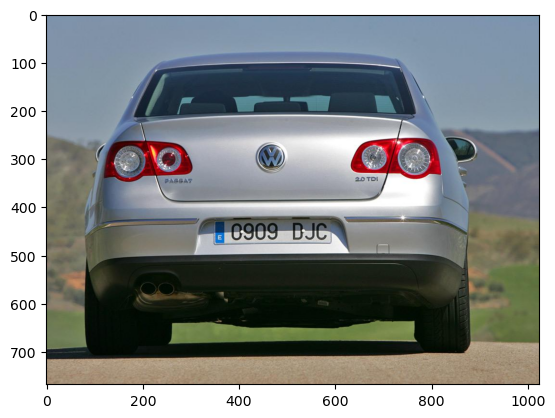

In [6]:
import matplotlib.pyplot as plt
plt.figure();plt.imshow(im)

En la siguiente celda vamos a hacer alguna transformación simple sobre la imagen, como convertirla a escala de grises, y luego salvarla (abra el archivo fuera de este cuaderno para ver lo que ha generado y almacenado).

Tenga en cuenta lo siguiente en el código que se proporciona:
- Cuando leemos una imagen, esta viene definida en el tipo de datos que se haya empleado según la cuantificación. Lo habnitual es que las imágenes se cuantifiquen con 8 bits (cada valor está en el rango 0-255) y que se lean como "uint8" o unsigned integer de 8 bits.
- No solemos trabajar en ese tipo de datos porque, por ejemplo, no permitiría  valores negativos (que podrían salir si aplicamos algún procesado) ni tampoco valores mayores que 255, causando overflows.
- Por ello, si vamos a procesar imágenes, lo que hacemos es convertirlas a punto flotante usando el método  **util.img_as_float()**. Los valores resultantes de los píxeles es escalan automáticamente al rango [0,1].
- Finalmente, si vamos a guardar la imagen, solemos reconvertirla a uint8 y al rango 0-255 mediante el método **util.img_as_ubyte()**
- Las imágenes se pueden mostrar tanto e uint8 como en float, pero el método imshow() considera que, según el tipo, la imagen debiera venir en el rango adecuado (si uint8 entre 0 y 255, si float entre 0 y 1).

In [7]:
im.shape

(768, 1024, 3)

En resumen, el cambio de formato de las imágenes se hace de la siguiente manera:

`import skimage.util as util`

* [0, 255] -> [0,1] : `util.img_as_float()`
* [0, 1] -> [0,255] : `util.img_as_ubyte()`

#### **Ejercicio 1**
  Rellene los huecos que faltan en la siguiente celda. Concretamente:

  1. Visualice los valores (R,G,B) del píxel que está en la posición [50, 50].
  2. Convierta la imagen de unasigned integer 8 bits [0, 255] a punto flotante [0, 1], usando el método **util.img_as_float()**.
  3. Convierta la imagen RGB a escala de grises utilizando el método **color.rgb2gray()**.
  4. Vuelva a convertir la imagen de punto flotante [0, 1] a uint8 [0, 255] para guardarla. Utilice el método **util.img_as_ubyte()**.

El pixel con coordenadas (50,50) vale [128 146 168]
El pixel con coordenadas (50,50) vale [0.5  0.57 0.66]
El pixel con coordenadas (50,50) vale 0.56
El pixel con coordenadas (50,50) vale [128 146 168]


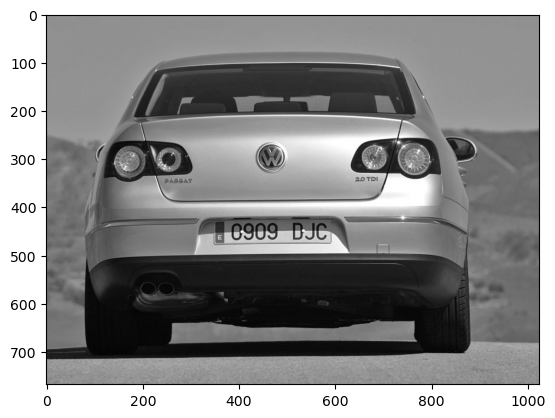

In [8]:
import skimage.color as color
import skimage.util as util

## Ejercicios
# 1. Visualizar el valor del píxel en la coordenada [50,50]
print('El pixel con coordenadas (50,50) vale {}'.format(im[50,50,:].round(2)))

# 2. Convertir la imagen a precisión float y mostrar el valor del píxel en la coordenada [50,50]
im = util.img_as_float(im) # Convierte la imagen de rango [0, 255] a [0, 1]
print('El pixel con coordenadas (50,50) vale {}'.format(im[50,50,:].round(2)))

# 3. Convertimos de RGB a escala de grises. Por defecto este comando escala los datos entre 0 y 1
imgray =  color.rgb2gray(im)
print('El pixel con coordenadas (50,50) vale {:.2f}'.format(imgray[50,50]))
plt.figure();plt.imshow(imgray,cmap=plt.cm.gray) #Mostramos la imagen con un mapa de grises

# 4. Conviertimos la imagen de rango [0, 1] a [0, 255] y después guardamos la imagen
img_uint8 = util.img_as_ubyte(im) # Convierte la imagen de rango [0, 1] a [0, 255]; a unsigned integer de 8 bits
print('El pixel con coordenadas (50,50) vale {}'.format(img_uint8[50,50]))
io.imsave('images/car_gray.jpg',img_uint8)

### Transformaciones punto a punto: modificando la intensidad y el color de los píxeles

La librería permite aplicar transformaciones sobre la intensidad y valores de los píxeles. El módulo a utilizar es `exposure`. A continuación se presentan algunos ejemplos de transformaciones, comenzando por visualizar el histograma y aplicar una **ecualización de histogramas** (ver descripción en [este enlace](https://en.wikipedia.org/wiki/Histogram_equalization)), que trata de generar una nueva imagen con una fdp uniforme.

/usr/lib/python3.14/site-packages/skimage/_shared/utils.py:587: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


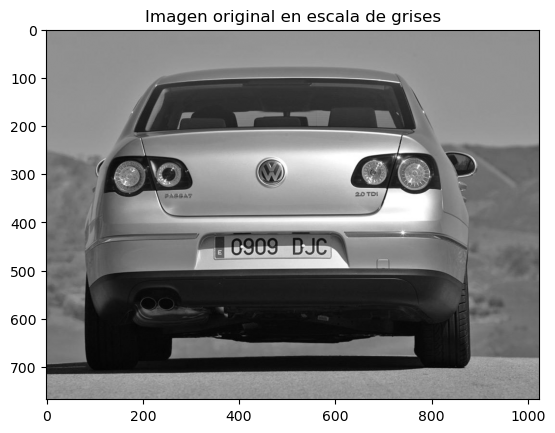

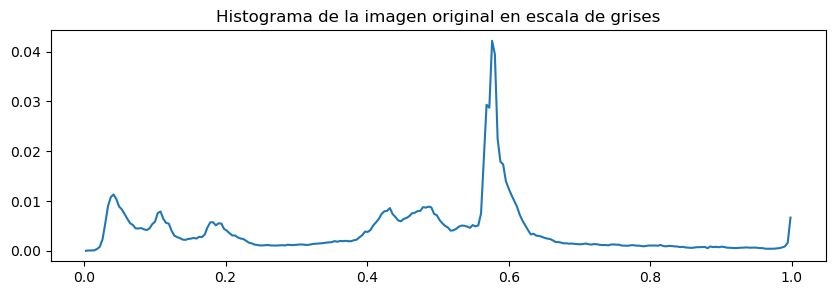

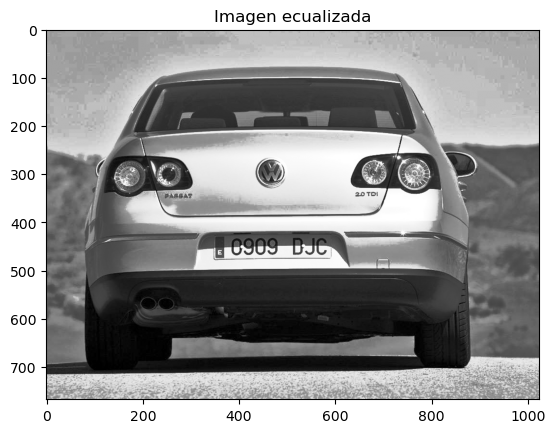

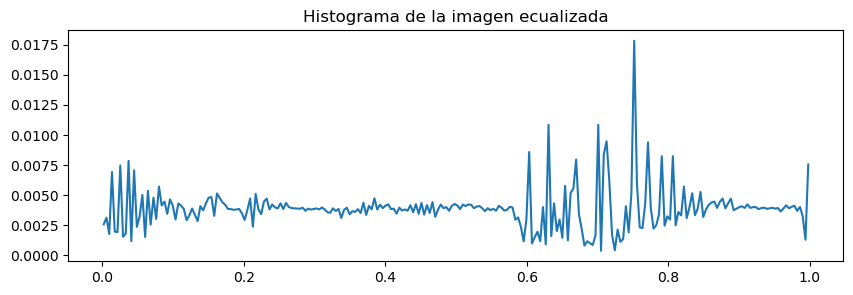

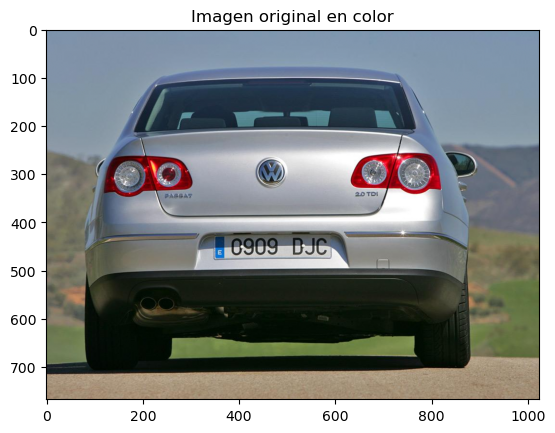

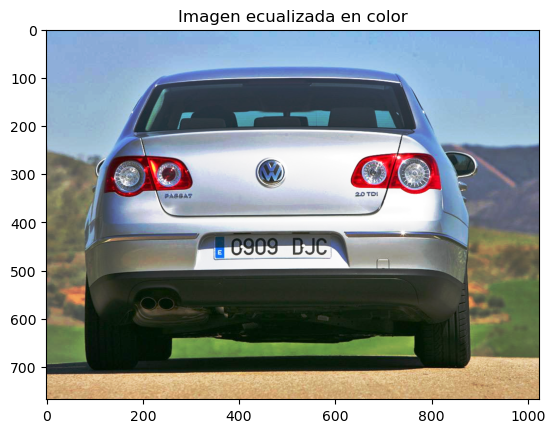

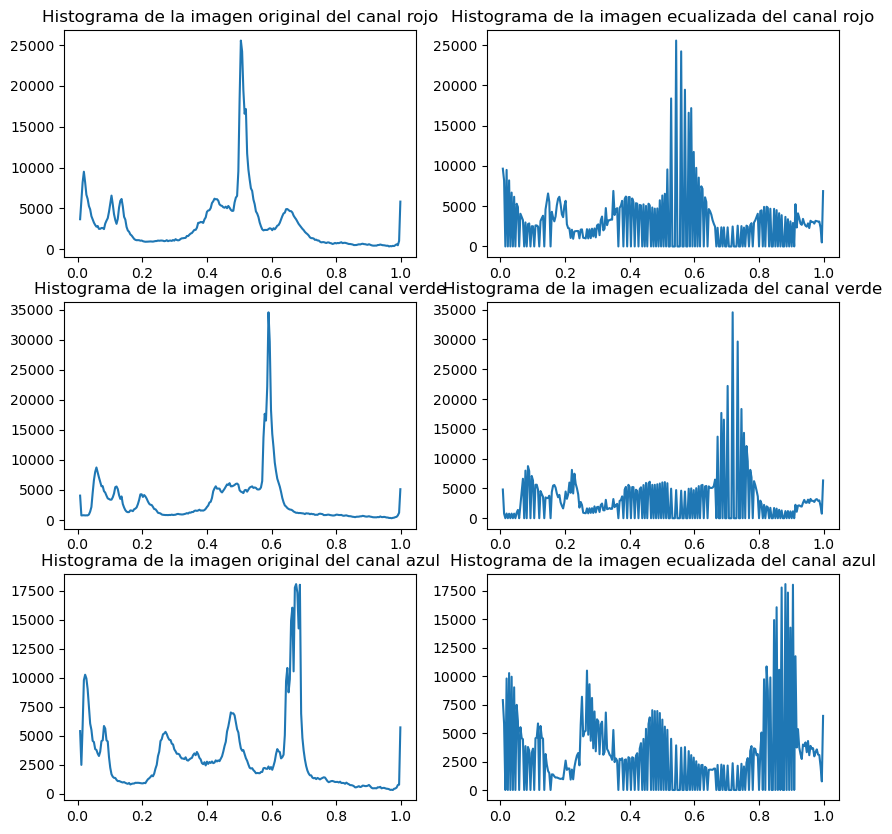

In [9]:
import skimage.exposure as exposure
#Cálculo del histograma
plt.figure();plt.imshow(imgray,cmap=plt.cm.gray) #Mostramos la imagen original
plt.title('Imagen original en escala de grises')

(histogram,bincenters)=exposure.histogram(imgray) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum() #Normalizamos el histograma para que aproxime una fdp
plt.figure(figsize=(10,3));plt.plot(bincenters,histogram) #Mostramos el histograma
plt.title('Histograma de la imagen original en escala de grises')

#Ecualización de histogramas
im_eq=exposure.equalize_hist(imgray) #Ecualizamos el histograma => im_eq tendrá una fdp uniforme
plt.figure();plt.imshow(im_eq,cmap=plt.cm.gray) #Mostramos la imagen ecualizada
plt.title('Imagen ecualizada')
(histogram,bincenters)=exposure.histogram(im_eq) #Calculamos el histograma de la imagen ecualizada
histogram=histogram/histogram.sum() #Normalizamos el histograma para que aproxime una fdp
plt.figure(figsize=(10,3));plt.plot(bincenters,histogram) #Mostramos el histograma
plt.title('Histograma de la imagen ecualizada')

#Ecualización de histogramas de la imagen en color
(histogram,bincenters)=exposure.histogram(im,channel_axis=2) #Indicamos que el axis de los canales es la dim=2
im_eq=exposure.equalize_hist(im)
(histogram_eq,bincenters)=exposure.histogram(im_eq,channel_axis=2) #Indicamos que el axis de los canales es la dim=2
plt.figure();plt.imshow(im) #Mostramos la imagen original en color
plt.title('Imagen original en color')
plt.figure();plt.imshow(im_eq) #Mostramos la imagen ecualizada en color
plt.title('Imagen ecualizada en color')

colors=['rojo','verde','azul']
plt.figure(figsize=(10,10));
for c in range(3):
    ax = plt.subplot(3, 2, 2*c+1)
    plt.plot(bincenters,histogram[c,:]) #Mostramos el histograma del canal c
    plt.title('Histograma de la imagen original del canal %s'%colors[c])
    ax = plt.subplot(3, 2, 2*c+2)
    plt.plot(bincenters,histogram_eq[c,:]) #Mostramos el histograma del canal c
    plt.title('Histograma de la imagen ecualizada del canal %s'%colors[c])

Además de la ecualización de histogramas, existe una versión mejorada que, operando en ventanas especiales, realiza una ecualización adaptativa a los valores concretos de cada área de la imagen: si nombre es `Contrast Limited Adaptive Histogram Equalization (CLAHE)` (ver descripción en [este enlace](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#Contrast_Limited_AHE)) y se implementa con el método `equalize_adapthist`. Haga algunas pruebas y visualice los resultados.

#### **Ejercicio 2**

Realice la ecualización adaptativa CLAHE sobre la imagen gris, utilizando el método **exposure.equalize_adapthist()**. Visualice lo siguiente:

1. La imagen gris ```imgray``` y su histograma acumulado.
2. La imagen ecualizada ```im_eq``` y su histograma acumulado.
3. La imagen ecualizada adaptativamente con CLAHE ```im_eq_clahe``` y su histograma acumulado.


**Pista:** Para calcular el histograma acumulado utilice la función **np.cumsum**.

```
(histogram_gray,bincenters_gray) = exposure.histogram(imgray)
histogram_gray=histogram_gray/histogram_gray.sum()
histograma_acumulado_gray = np.cumsum(histogram_gray)
```

¿Qué diferencias observa entre los histogramas acumulados de las tres imágenes?










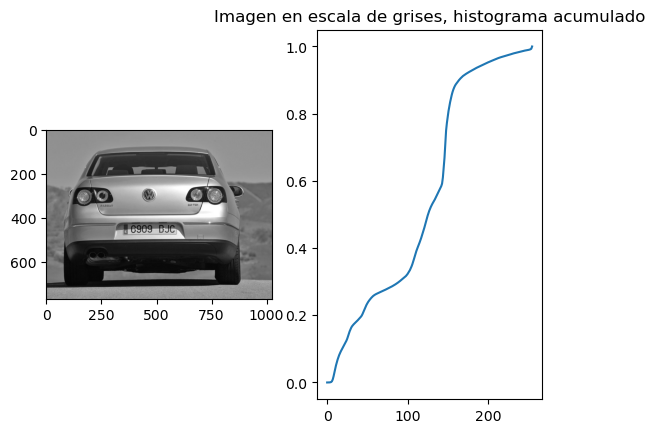

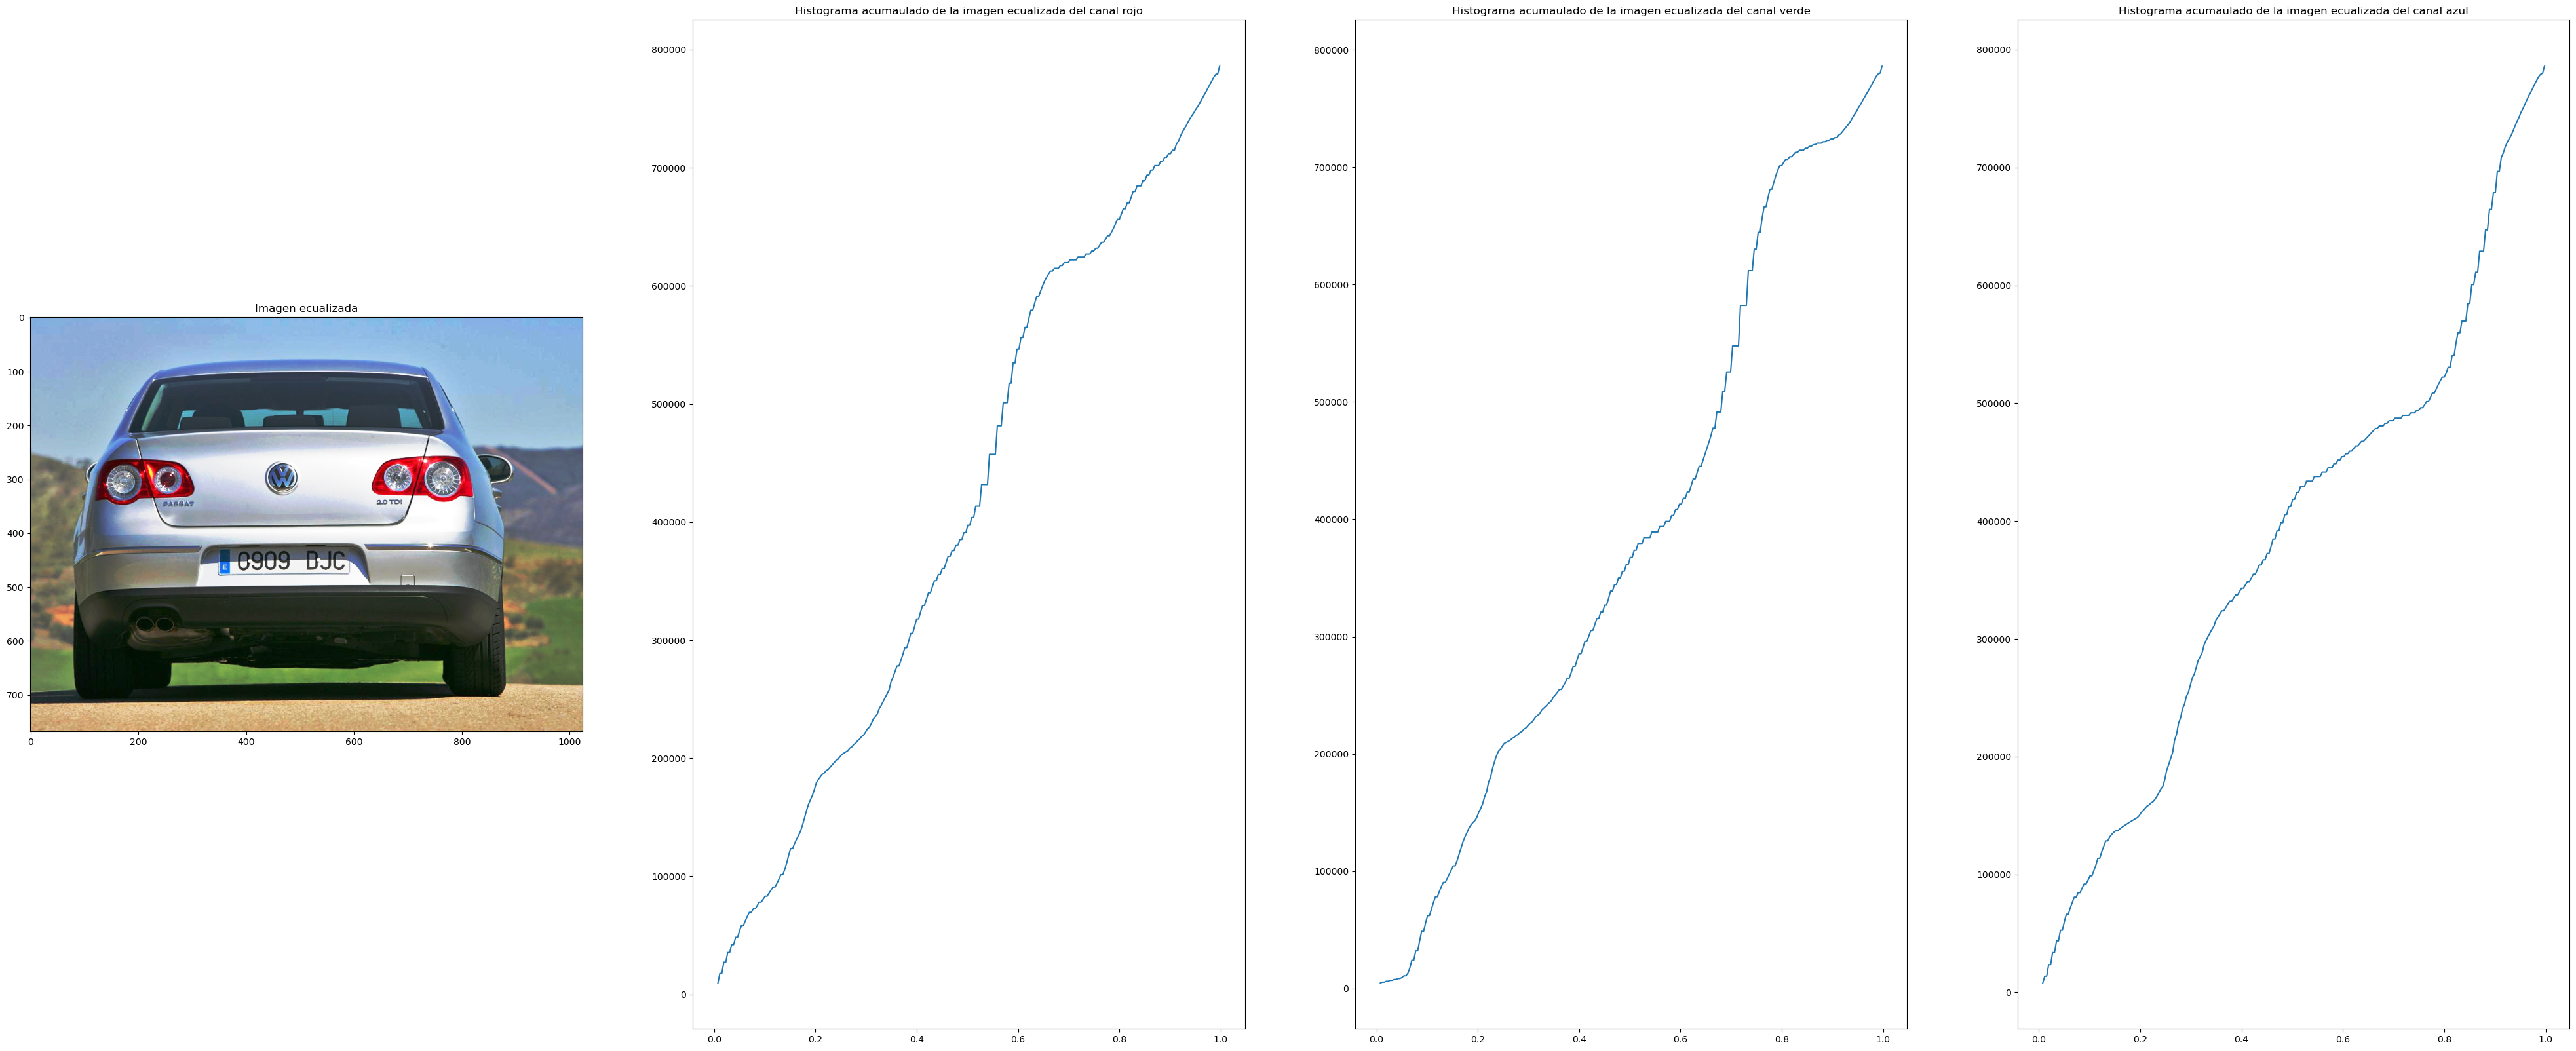

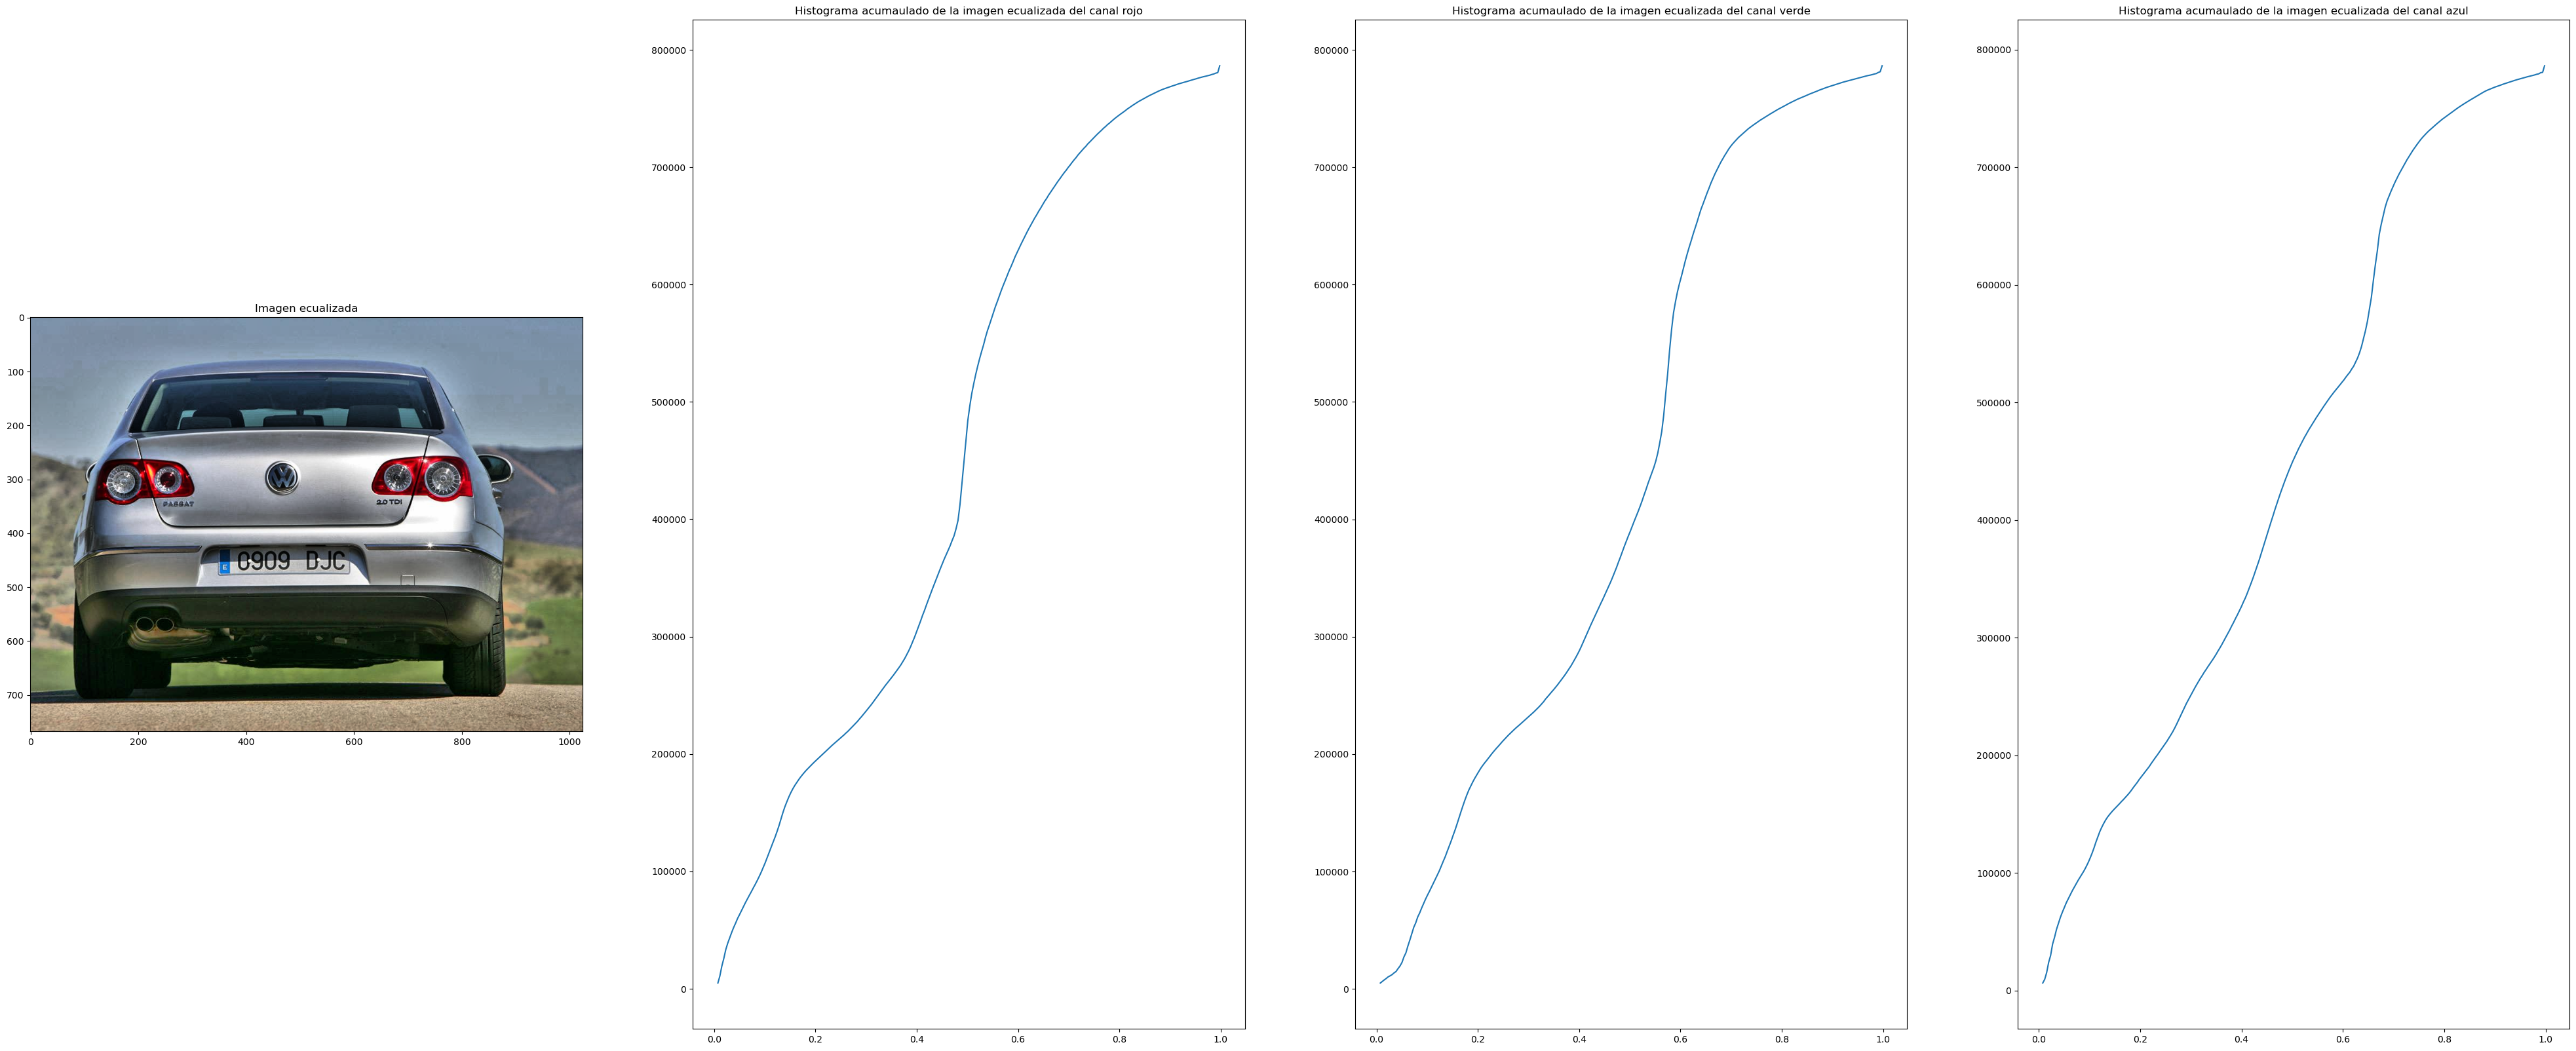

In [10]:
#Espacio para que el alumno realice sus experimentos
from skimage.exposure import equalize_adapthist

# Imagen en escala de grises
(histogram_gray,bincenters_gray) = exposure.histogram(imgray)
histogram_gray=histogram_gray/histogram_gray.sum()
cum_histogram_gray = np.cumsum(histogram_gray)

# Imagen ecualizada: histogramas acumulados
cum_histogram_eq = histogram_eq;
for c in range(3):
  cum_histogram_eq[c,:] = np.cumsum(histogram_eq[c,:])

# Imagen ecualizada con CLAHE
im_eq_clahe = exposure.equalize_adapthist(im)
(histogram_eq_clahe,bincenters_clahe) = exposure.histogram(im_eq_clahe, channel_axis=2)
#histogram_eq_clahe /= histogram_eq_clahe.sum()
cum_histogram_eq_clahe = histogram_eq_clahe;
for c in range(3):
  cum_histogram_eq_clahe[c,:] = np.cumsum(histogram_eq_clahe[c,:])

plt.figure()
# Imgray y su histograma acumulado
plt.subplot(1,2,1)
plt.imshow(imgray,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.plot(cum_histogram_gray)
plt.title('Imagen en escala de grises, histograma acumulado')

# Imagen ecualizada y su hist. acum.
plt.figure(figsize=(50,20))
plt.subplot(1,4,1)
plt.imshow(im_eq)
plt.title('Imagen ecualizada')

colors=['rojo','verde','azul']
for c in range(3):
    ax = plt.subplot(1, 4, c+2)
    plt.plot(bincenters,cum_histogram_eq[c,:]) #Mostramos el histograma del canal c
    plt.title('Histograma acumaulado de la imagen ecualizada del canal %s'%colors[c])

# Imagen CLAHE
plt.figure(figsize=(50,20))
plt.subplot(1,4,1)
plt.imshow(im_eq_clahe)
plt.title('Imagen ecualizada')

colors=['rojo','verde','azul']
for c in range(3):
    ax = plt.subplot(1, 4, c+2)
    plt.plot(bincenters,cum_histogram_eq_clahe[c,:]) #Mostramos el histograma del canal c
    plt.title('Histograma acumaulado de la imagen ecualizada del canal %s'%colors[c])

También podemos usar otras funciones el ajuste del contraste por reescalado de valores de intensidad, la corrección gamma (ver descripción [aquí](https://en.wikipedia.org/wiki/Gamma_correction)) y la transformación logarítmica (expansión de valores pequeños y compresión de los grandes).

Text(0.5, 1.0, 'Imagen logarítmica')

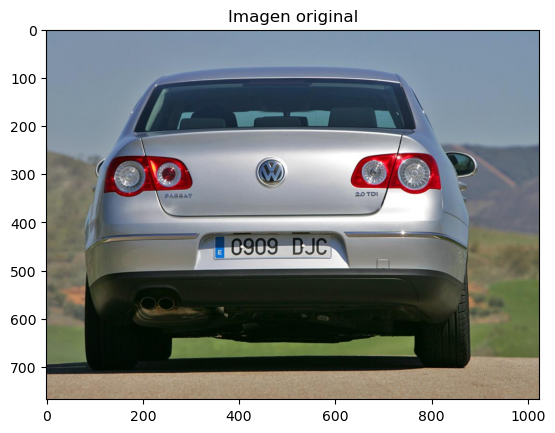

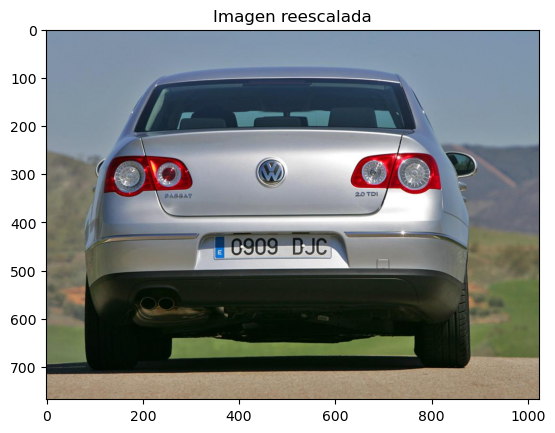

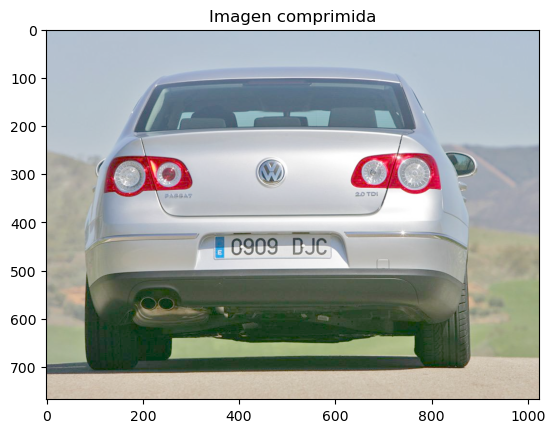

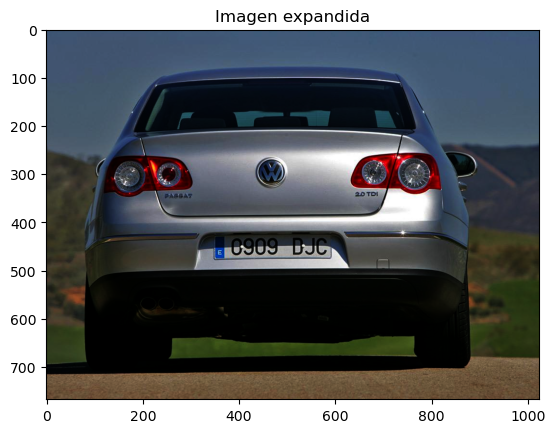

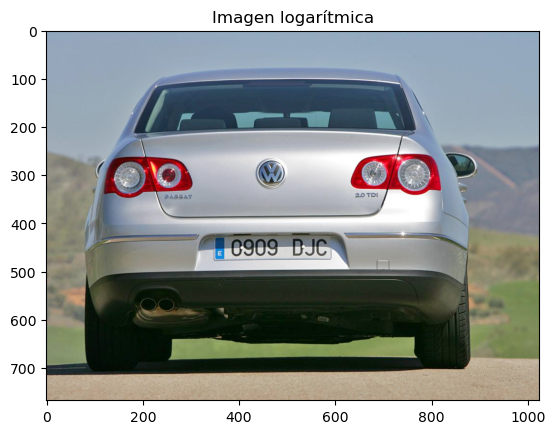

In [11]:
#Ajuste del contraste por re-escalado de valores
plt.figure();plt.imshow(im) #Mostramos la imagen original en color
plt.title('Imagen original')
im_reescaled=exposure.rescale_intensity(im)
plt.figure();plt.imshow(im_reescaled) #Mostramos la imagen re-escalada en color
plt.title('Imagen reescalada')

#Compresión y expansión de valores
im_compressed = exposure.adjust_gamma(im, gamma=0.5)
plt.figure();plt.imshow(im_compressed) #Mostramos la imagen comprimida
plt.title('Imagen comprimida')

im_expanded = exposure.adjust_gamma(im, gamma=2)
plt.figure();plt.imshow(im_expanded) #Mostramos la imagen expandida
plt.title('Imagen expandida')

#Transformación logarítmica (los valores pequeños-píxeles oscuros se expanden
# y los valores grandes-píxeles claros se comprimen)
im_log = exposure.adjust_log(im, gain=1)
plt.figure();plt.imshow(im_log) #Mostramos la imagen logaritmica
plt.title('Imagen logarítmica')



In [12]:
## Plots largos

# En esta celda hay plots para ver las imagenes con sus histogramas correspondientes. Descomentar y ejecutar si se quieren ver

'''
########## Plots ##########
plt.figure(figsize=(25,20));

## Original
plt.subplot(5, 4, 1)
plt.imshow(im) #Mostramos la imagen original en color
plt.title('Imagen original')
(histogram,bincenters)=exposure.histogram(im[:,:,0]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 2)
plt.plot(bincenters,histogram) #Mostramos la imagen original en color
plt.title('Histograma R de la imagen original')
(histogram,bincenters)=exposure.histogram(im[:,:,1]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 3)
plt.plot(bincenters,histogram) #Mostramos la imagen original en color
plt.title('Histograma G de la imagen original')
(histogram,bincenters)=exposure.histogram(im[:,:,2]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 4)
plt.plot(bincenters,histogram) #Mostramos la imagen original en color
plt.title('Histograma B de la imagen original')

## Re-escalada
plt.subplot(5, 4, 5)
plt.imshow(im_reescaled) #Mostramos la imagen re-escalada en color
plt.title('Imagen reescalada')
(histogram,bincenters)=exposure.histogram(im_reescaled[:,:,0]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 6)
plt.plot(bincenters,histogram)
plt.title('Histograma R de la imagen re-escalada')
(histogram,bincenters)=exposure.histogram(im_reescaled[:,:,1]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 7)
plt.plot(bincenters,histogram)
plt.title('Histograma G de la imagen re-escalada')
(histogram,bincenters)=exposure.histogram(im_reescaled[:,:,2]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 8)
plt.plot(bincenters,histogram)
plt.title('Histograma B de la imagen re-escalada')


#Compresión y expansión de valores
im_compressed = exposure.adjust_gamma(im, gamma=0.5)
plt.subplot(5, 4, 9)
plt.imshow(im_compressed) #Mostramos la imagen comprimida
plt.title('Imagen comprimida')
(histogram,bincenters)=exposure.histogram(im_compressed[:,:,0]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 10)
plt.plot(bincenters,histogram)
plt.title('Histograma R de la imagen comprimida')
(histogram,bincenters)=exposure.histogram(im_compressed[:,:,1]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 11)
plt.plot(bincenters,histogram)
plt.title('Histograma G de la imagen comprimida')
(histogram,bincenters)=exposure.histogram(im_compressed[:,:,2]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 12)
plt.plot(bincenters,histogram)
plt.title('Histograma B de la imagen comprimida')


im_expanded = exposure.adjust_gamma(im, gamma=2)
plt.subplot(5, 4, 13)
plt.imshow(im_expanded) #Mostramos la imagen expandida
plt.title('Imagen expandida')
(histogram,bincenters)=exposure.histogram(im_expanded[:,:,0]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 14)
plt.plot(bincenters,histogram)
plt.title('Histograma R de la imagen expandida')
(histogram,bincenters)=exposure.histogram(im_expanded[:,:,1]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 15)
plt.plot(bincenters,histogram)
plt.title('Histograma G de la imagen expandida')
(histogram,bincenters)=exposure.histogram(im_expanded[:,:,2]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 16)
plt.plot(bincenters,histogram)
plt.title('Histograma B de la imagen expandida')


#Transformación logarítmica (los valores pequeños-píxeles oscuros se expanden
# y los valores grandes-píxeles claros se comprimen)
im_log = exposure.adjust_log(im, gain=1)
plt.subplot(5, 4, 17)
plt.imshow(im_log) #Mostramos la imagen logaritmica
plt.title('Imagen logarítmica')
(histogram,bincenters)=exposure.histogram(im_log[:,:,0]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 18)
plt.plot(bincenters,histogram)
plt.title('Histograma R de la imagen logarítmica')
(histogram,bincenters)=exposure.histogram(im_log[:,:,1]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 19)
plt.plot(bincenters,histogram)
plt.title('Histograma G de la imagen logarítmica')
(histogram,bincenters)=exposure.histogram(im_log[:,:,2]) #Calculamos el histograma de la imagen en escala de grises
histogram=histogram/histogram.sum()
plt.subplot(5, 4, 20)
plt.plot(bincenters,histogram)
plt.title('Histograma B de la imagen logarítmica')
'''

"\n########## Plots ##########\nplt.figure(figsize=(25,20));\n\n## Original\nplt.subplot(5, 4, 1)\nplt.imshow(im) #Mostramos la imagen original en color\nplt.title('Imagen original')\n(histogram,bincenters)=exposure.histogram(im[:,:,0]) #Calculamos el histograma de la imagen en escala de grises\nhistogram=histogram/histogram.sum()\nplt.subplot(5, 4, 2)\nplt.plot(bincenters,histogram) #Mostramos la imagen original en color\nplt.title('Histograma R de la imagen original')\n(histogram,bincenters)=exposure.histogram(im[:,:,1]) #Calculamos el histograma de la imagen en escala de grises\nhistogram=histogram/histogram.sum()\nplt.subplot(5, 4, 3)\nplt.plot(bincenters,histogram) #Mostramos la imagen original en color\nplt.title('Histograma G de la imagen original')\n(histogram,bincenters)=exposure.histogram(im[:,:,2]) #Calculamos el histograma de la imagen en escala de grises\nhistogram=histogram/histogram.sum()\nplt.subplot(5, 4, 4)\nplt.plot(bincenters,histogram) #Mostramos la imagen original

### Transformaciones geométricas

A lo largo de la asignatura necesitaremos transformar geométricamente las imágenes. Esto se hace a través del submódulo `transform`. Una de las operaciones más modificar habitualmente el tamaño de una imagen:

El tamaño de la imagen es (768, 1024, 3)
El tamaño de la imagen reescalada por un factor de 0.5 es (384, 512, 3)
El tamaño de la imagen reescalada a un tamaño fijo es (224, 224, 3)


Text(0.5, 1.0, 'Imagen de (224, 224) px')

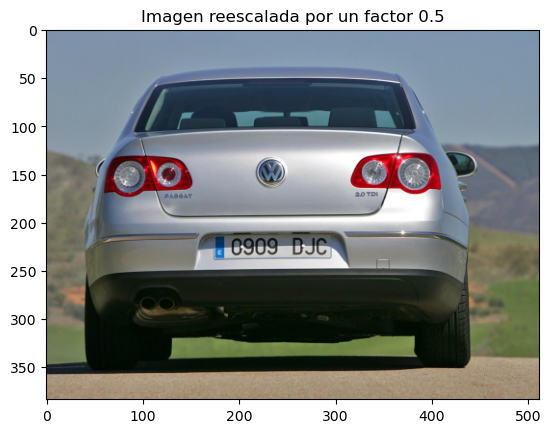

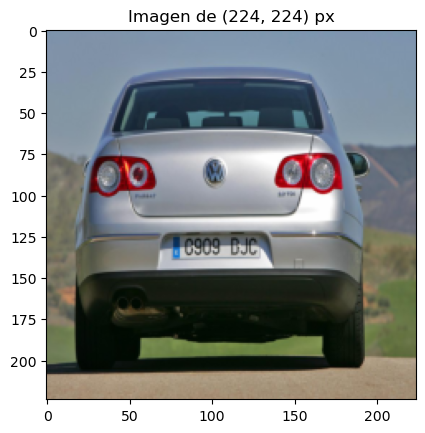

In [13]:
import skimage.transform as transform
print('El tamaño de la imagen es {}'.format(im.shape)) #Mostramos las dimensiones de la imagen original
im=util.img_as_float(im) #Antes de comenzar a procesar la imagen, la convertimos a precisión float

#Escalado manteniendo proporciones-relación de aspecto
factor=0.5 #factor de reescalado
im_small=transform.rescale(im,factor,channel_axis=2) # Con rescale podemos indicar la proporción de re-escalado para la nueva imagen
print('El tamaño de la imagen reescalada por un factor de {} es {}'.format(factor,im_small.shape))  #Mostramos por pantalla las dimensiones de la nueva imagen
plt.figure();plt.imshow(im_small) #Mostramos la nueva imagen, que está deformada al no haber respetado la relación de aspecto entre dimensiones
plt.title('Imagen reescalada por un factor {}'.format(factor))

#Escalado a tamaño fijo, sin respetar proporciones-relación de aspecto
new_size=(224,224) #New size
im_resized=transform.resize(im,new_size) # Con resize podemos indicar directamente las dimensiones como una tupla
print('El tamaño de la imagen reescalada a un tamaño fijo es {}'.format(im_resized.shape))  #Mostramos por pantalla las dimensiones de la nueva imagen
plt.figure();plt.imshow(im_resized) #Mostramos la nueva imagen, que está deformada al no haber respetado la relación de aspecto entre dimensiones
plt.title('Imagen de {} px'.format(new_size))

####**Ejercicio 3**

Las funciones que reescalan una imagen `(resize, rescale)` permiten elegir el algoritmo de interpolación que se emplea para calcular las nuevas muestras. En la siguiente caja se pide:
- 1.- Reescale la imagen a un tamaño que sea 1/10 el original, generando `im_small`
- 2.- Vuelva a recuperar el tamaño original de la imagen generando `im_recovered`
- 3.- Visualice el resultado de `im_recovered` y compárelo con la imagen original

Repita el proceso utilizando diferentes algoritmos de interpolación. AYUDA: consulte la documentación de las funciones, en especial el parámetro order.

Compare la percepción de los números de la matrícula para los diferentes métodos.

El tamaño de la imagen es (768, 1024, 3)
El tamaño de la imagen reescalada por un factor de 0.1 es (77, 102, 3)


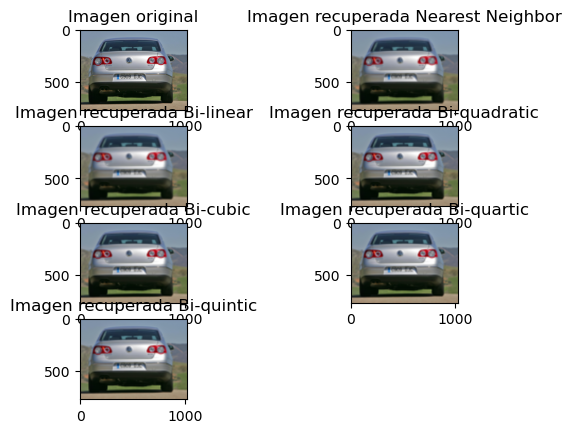

In [19]:
#Espacio para que el alumno realice sus experimentos

## Imagen original
print('El tamaño de la imagen es {}'.format(im.shape)) #Mostramos las dimensiones de la imagen original
im=util.img_as_float(im) #Antes de comenzar a procesar la imagen, la convertimos a precisión float

#############################
## Hacer la imagen pequeña
#############################

# Imagen pequeña
factor = 0.1
im_small = transform.rescale(im,factor,channel_axis=2)
print('El tamaño de la imagen reescalada por un factor de {} es {}'.format(factor,im_small.shape))

#############################
## Recuperar el tamaño de la imagen original, a partir de la imagen pequeña
#############################

## Imagen recuperada
new_size=(im.shape[0],im.shape[1])

# Orders of interpolation:
# 0: Nearest Neighbour
# 1: default Bi-linear interpolation
# 2: Bi-quadratic
# 3: Bi-cubic
# 4: Bi-quartic
# 3: Bi-quintic


rows = 4
cols = 2
idx = 1

def resize_and_show(im, size, alg_order: int, text: str):
    global idx
    global rows
    global cols
    im_recovered=transform.resize(im,new_size,order=alg_order)
    plt.subplot(rows,cols,idx)
    plt.imshow(im_recovered)
    plt.title(text)
    idx += 1

# Algoritmo 1: Reshape nearest neighbor
plt.figure()
plt.subplot(rows,cols,idx)
plt.imshow(im)
plt.title('Imagen original')
idx += 1

resize_and_show(im_small, new_size, 0, 'Imagen recuperada Nearest Neighbor')

# Repita el proceso con diferentes algoritmos de interpolación
# Algoritmo 2: Reshape bi-linear
resize_and_show(im_small, new_size, 1, 'Imagen recuperada Bi-linear')
# Algoritmo 3: Reshape bi-quadratic
resize_and_show(im_small, new_size, 2, 'Imagen recuperada Bi-quadratic')
# Algoritmo 4: Reshape bi-cubic
resize_and_show(im_small, new_size, 3, 'Imagen recuperada Bi-cubic')
# Algoritmo 5: Reshape bi-quartic
resize_and_show(im_small, new_size, 4, 'Imagen recuperada Bi-quartic')
# Algoritmo 6: Reshape bi-quintic
resize_and_show(im_small, new_size, 5, 'Imagen recuperada Bi-quintic')

A continuación mostramos otras posibles transformaciones geométricas que usaremos habitualmente, como el cropping (recortado) o la rotación:

(768, 1024, 3)
(668, 924, 3)


Text(0.5, 1.0, 'Imagen rotada')

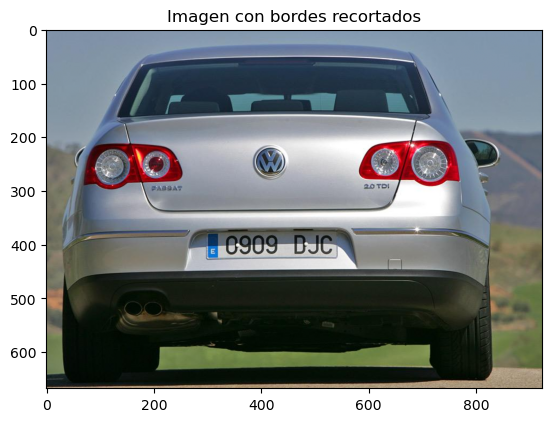

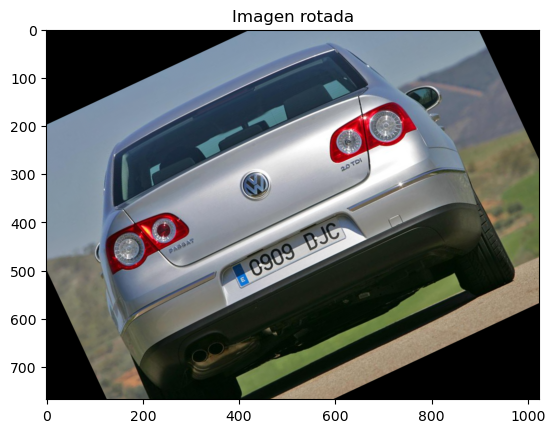

In [20]:
#Recorte de la imagen
borders=50
print(im.shape) #Dimensiones de la imagen original
im_cropped=im[borders:-borders,borders:-borders,:] #Eliminamos 50 píxeles de todos los bordes de la imagen
print(im_cropped.shape) #Dimensiones de la imagen recortada
plt.figure();
plt.imshow(im_cropped)
plt.title('Imagen con bordes recortados')

#Rotación de la imagen
angle=25 #Vamos a rotar la imagen 25 grados
im_rotated=transform.rotate(im,angle)
plt.figure();plt.imshow(im_rotated)
plt.title('Imagen rotada')

#### **Ejercicio 4**
En el ejemplo superior, aparecen nuevas áreas en negro en aquellas zonas de la imagen rotada que no tienen correspondencia en la imagen original. Consulte la documentación de la función rotate y experimente con las diferentes opciones para el parámetro `mode`.

¿Para qué sirve dicho parámetro?

Nota: utilice la función `transform.rotate`

In [ ]:
#Espacio para que el alumno realice sus experimentos


modes = [## Rellene este hueco ##]

#Recorte de la imagen
borders=50
print(im.shape) #Dimensiones de la imagen original
im_cropped=im[borders:-borders,borders:-borders,:] #Eliminamos 50 píxeles de todos los bordes de la imagen
print(im_cropped.shape) #Dimensiones de la imagen recortada
plt.figure();
plt.imshow(im_cropped)
plt.title('Imagen con bordes recortados')


#Rotación de la imagen
angle=25 #Vamos a rotar la imagen 25 grados
for mode in modes:

  im_rotated=## Rellene este hueco ##

  plt.figure();plt.imshow(im_rotated)
  plt.title(f'Imagen rotada {mode}')


### Filtrado de imágenes

Ahora vamos a realizar algunos experimentos con el filtrado de imágenes. El módulo que lo implementa es `filters`. Vamos a comenzar con algunos filtros paso bajo conocidos:

In [ ]:
import numpy as np
import skimage.filters as filters

#Filtro paso bajo Gaussiano con sigma = 1
im_lpf=filters.gaussian(im, sigma=1.0,channel_axis=2)
plt.figure();plt.imshow(im_lpf)
plt.title('Imagen filtrada con Gaussiana de sigma=1')

#### **Ejercicio 5**

Pruebe a utilizar filtros Gaussianos con diferentes sigmas. Por ejemplo, pruebe con [1, 2, 5 y 10].

¿Qué diferencias observa?

In [ ]:

## Rellene los huecos correspondientes

sigmas = [ ## Rellene este hueco ##]

for sigma in sigmas:
  im_lpf= filters.gaussian(im, sigma=sigma,channel_axis=2)
  plt.figure();plt.imshow(im_lpf)
  plt.title(f'Imagen filtrada con Gaussiana de sigma={sigma}')

Si queremos utilizar un filtro a través de una máscara creada, la forma más sencilla es usar el método `skimage.filters.correlate_sparse()`.

In [ ]:
#Filtro de media en un vecindario de tamaño 25x25
mask = np.ones((25,25),dtype=float)
mask = mask/mask.sum()

#Tenemos que filtrar canal a canal para una imagen en color
im_lpf=np.zeros_like(im)
for d in range(3):
    im_lpf[:,:,d]=filters.correlate_sparse(im[:,:,d], mask)

#Reajustamos los límites de la imagen entre 0,1
im_lpf=np.clip(im_lpf, 0, 1.0)

plt.figure();plt.imshow(im_lpf)
plt.title('Imagen filtrada con un filtro de media 25x25')

También podemos calcular fácilmente los gradientes de la imagen. A continuación algunos ejemplos:

In [ ]:
#Calculamos directamente las magnitud del gradiente mediante los gradientes de Sobel
im_gradmag=filters.sobel(imgray) # Por defecto filters.sobel calcula la salida combinada de los
                                 # gradientes horizontales y verticales
plt.figure();plt.imshow(im_gradmag,cmap=plt.cm.gray)
plt.title('Magnitud de gradientes de Sobel')

#Podemos calcular los gradientes horizontales y verticales por separado
im_gradh=filters.sobel_h(imgray)
plt.figure();plt.imshow(np.abs(im_gradh),cmap=plt.cm.gray)
plt.title('Magnitud de gradientes de Sobel horizontales')

im_gradv=filters.sobel_v(imgray)
plt.figure();plt.imshow(np.abs(im_gradv),cmap=plt.cm.gray)
plt.title('Magnitud de gradientes de Sobel verticales')

#### **Ejercicio 6**
Los gradientes también pueden calcularse con filtros de Gabor, que son robustos frente al ruido y permiten buscar gradientes en múltiples direcciones. Para ello, podemos hacer uso del método `gabor`. Haga algunas pruebas y busque, por ejemplo, bordes en orientaciones particulares (30º, 45º, etc.).

NOTA: La salida va a depender mucho de los parámetros del filtro. Algunos valores que funcionan razonablemente bien para los parámetros son:
- frequency = 0.1
- bandwidth = 1.1

NOTA: Recuerde que el filtro de Gabor tiene parte real (coseno) e imaginaria (seno). Eso significan que la salida del filtro será una dupla con las partes real e imaginaria de la imagen filtrada. En consecuencia, tiene que visualizar por separado la salida de cada filtro (la parte real por un lado y la parte imaginaria por el otro).

**Tenga en cuenta que el método gabor acepta ángulos en radianes**

In [ ]:
## Rellene esta celda

frequency =  ## Rellene este hueco ##
bandwidth =  ## Rellene este hueco ##
angles = [ ## Rellene este hueco ##]

for i, theta in enumerate(angles):
  theta_rad = np.deg2rad(theta)  # Convertir ángulo a radianes

  real, imag = filters.gabor(imgray, frequency=frequency, theta=theta_rad, bandwidth=bandwidth)

  plt.figure()
  plt.imshow(np.abs(real), cmap=plt.cm.gray)
  plt.title(f"Real (θ={theta}°)")

  plt.figure()
  plt.imshow(np.abs(imag), cmap=plt.cm.gray)
  plt.title(f"Imaginario (θ={theta}°)")


## Parte B: Primeros pasos con PyTorch

En esta práctica vamos a dar también los primeros pasos con la librería `torch`. Para utilizar la librería tenemos que importarla:

In [ ]:
import torch

ModuleNotFoundError: No module named 'torch'

Torch sustituye a numpy para operar sobre GPUs. Así los arrays de numpy se convierte en tensores torch, los cuales pueden manejarse tanto en CPU como en GPU, si se dispone de una adecuada. Por tanto, muchos de los métodos que permiten crear arrays en numpy son también válidos en torch:

In [ ]:
#Crear un tensor vacio (valores inicializados al azar) de dimensión 5x3
x = torch.empty(5, 3)
print(x) #Mostramos valores
print(x.type()) #Mostramos tipo: por defecto es float

#Crear un tensor de tamaño 5x3 con valores inicializados uniformemente entre 0 y 1
x = torch.rand(5, 3)
print(x) #Mostramos valores

#Crear un tensor de tamaño 5x3, con sus valores a cero, y de tipo long
x = torch.zeros(5, 3, dtype=torch.long)
print(x) #Mostramos valores
print(x.type()) #Mostramos tipo

#Crear un tensor a partir de datos inicializados
x = torch.tensor([5.5, 3])
print(x)



También podemos crear nuevos tensores a partir de información disponible en otros ya existente

In [ ]:
x = torch.ones(5, 3, dtype=torch.double)      #Creamos un tensor double de 1s
print(x)
print(x.size())

#Generamos tensor relacionado: inicianlizando desde una variable normal
x = torch.randn_like(x, dtype=torch.float)    # sobreescribimos el dtype!
print(x)                                      # el resultado tiene el mismo tamaño que x
print(x.size())

### Operaciones básicas

Las operaciones básicas en torch se pueden ejecutar de diversas formas:

In [ ]:
#Sintaxis 1: operadores
y = torch.rand(5, 3)
print(x + y)

#Sintaxis 2: métodos
print(torch.add(x, y))

#Sintaxis 3: método indicando la salida
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

También podemos ejecutar algunos métodos en su versión 'in-place', en la que el contenido de un tensor se sustituye por el resultado de la operación. Para llamar al método inplace, caso de que exista, se utilizará la sintaxis `tensor.<método>_()` (por ejemplo, x.copy_(y), x.t_()):

In [ ]:
#Operación in-place que sobreescribe y y=y+x
y.add_(x)
print(y)

El indexado de tensores en torch es exactamente igual que para arrays numpy:

In [ ]:
x=torch.rand(3,5)
print(x[:, 1])
print(x[:, 1].size())


x=torch.rand(3,5,3)
print(x[0,...])
print(x[0, ...].size())

### Conversión Torch-Numpy

Es muy fácil cambiar el tamaño de los tensores de pytorch con el método `view`.:

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # el tamaño -1 se infiere de las otras dimensiones:
print(x.size(), y.size(), z.size())

Convertir entre tensores de Torch y arrays numpy es muy sencillo. Ambos compartirán el espacio de memoria (sólo si el tensor de Torch es CPU), y cambiar uno implicará cambiar el otro:

In [ ]:
#Creamos un tensor de torch
a = torch.ones(5)
print('a {}'.format(a))

#Convertimos a array numpy
b = a.numpy()
print('b {}'.format(b))

#Sumamos 1 a todos los elementos de a (in-place)
a.add_(1)
print('a {}'.format(a))
print('b {}'.format(b))




Y viceversa, podemos convertir un array numpy a un tensor torch:

In [ ]:
a = np.ones(5,dtype=np.float32)
b = torch.from_numpy(a)
print('a {}'.format(a))
print('b {}'.format(b))
np.add(a, 1, out=a)
print('a {}'.format(a))
print('b {}'.format(b))

### Tensores Torch en GPU

Podemos mover un tensor de torch desde la CPU a una GPU (únicamente si tenemos una GPU compatible), y hacer cálculos sobre la GPU:

In [ ]:
x = torch.ones(5,5)
if torch.cuda.is_available():
    device = torch.device("cuda")          # El objeto dispositivo es de tipo "cuda"
    y = torch.ones_like(x, device=device)  # Creamos un tensor directamente en GPU
    x = x.to(device)                       # O bien copiamos el tensor en CPU a la GPU
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` también puede cambiar el dtype!


En el siguiente experimento vamos a realizar un producto matriz por vector Wx en CPU y GPU para comparar el tiempo de procesado y evaluar las capacidades de paralelización en el cómputo de una GPU.

In [ ]:
#importamos la librería time
import time

x=torch.rand(1000)
W=torch.rand(10000,1000)
tic = time.perf_counter()
y=torch.mv(W,x)
toc = time.perf_counter()
print('y: {}'.format(y))
time_ms=(toc-tic)*1000
print('Elapse time in CPU: {:.2f} ms'.format(time_ms))

if torch.cuda.is_available():
    device = torch.device("cuda")          # El objeto dispositivo es de tipo "cuda"
    x = x.to(device)                       # Copiamos el tensor en CPU a la GPU
    W = W.to(device)
    tic = time.perf_counter()
    y=torch.mv(W,x)
    toc = time.perf_counter()
    print('y: {}'.format(y))
    time_ms=(toc-tic)*1000
    print('Elapse time in GPU: {:.2f} ms'.format(time_ms))




EXPERIMENTO: Modifique los valores de los tamaños de matriz y vector para ver si las ganancias en tiempo de cómputo tienen alguna dependencia con ellos. En general, ¿cuándo es preferible hacer los cálculos en una GPU?

NOTA: Repita la ejecución de la celda dos veces al empezar y no considere los valores de una primera ejecución. Al no haber usado la GPU con anterioridad, hay una primera fase de inicialización de la GPU que luego ya no afectaría.

### Autograd: Grafos y derivavilidad automática

El paquete que permite optimizar y entrenar redes neuronales en pytorch es ``autograd``. A continuación haremos  algunas pruebas con este paquete.

El paquete ``autograd`` proporciona diferenciación/derivación automática de las operaciones que se realizan sobre tensores torch. Básicamente, este paquete implementa la retropropagación de forma automática, de modo que los gradientes se calculan a partir del código que se ejecuta en cada momento, pudiendo variar de una iteración a otra si el código así lo indica. Esto permite a pytorch trabajar con ``grafos computacionales dinámicos`` y crear redes neuronales que se comporten de forma diferente en cada ejecución, lo que supone su gran ventaja con respecto a otras librerías de deep learning.

``torch.Tensor`` es la clase central del paquete. Si a un tensor se le pone el atributo ``.requires_grad`` a ``True``, entonces se registran todas las operaciones que se realizan sobre dicho tensor. Cuando los cálculos finalizan, podemos llamar al método ``.backward()`` y calcular de forma automática todos los gradientes. El gradiente de un tensor se acumulará en su atributo ``.grad``.

Para hacer que un tensor deje de registrar sus operaciones, podemos llamar al método ``.detach()``, de modo que no se registrarán las operaciones futuras.

Para evitar el registro de operaciones (y consiguiente consumo de memoria), también podemos rodear un bloque de código con ``with torch.no_grad():``. Esto puede ser muy útil al evaluar un modelo entrenado pues, aunque no sea necesario calcular gradientes, algunos parámetros del modelo pueden tener el atributo ``requires_grad=True`` y consumir memoria innecesariamente.

Hay otra clase que es muy importante en el paquete autograd, la clase ``Function``.

``Tensor`` y ``Function`` están inter-conectadas y juntas generar un grafo acíclico, que codifica toda la serie de cálculos a realizar. Cada tensor tiene un atributo ``.grad_fn`` que referencia a una función (``Function``) que ha creado el ``Tensor`` (excepto los tensores creados por un usuario, para los que ``grad_fn is None``).

Si quieres calcular derivadas, entonces puedes llamar al método ``.backward()`` de un ``Tensor``. Si el ``Tensor`` es un escalar, no hace falta especificar ningún argumento en la llamada a ``backward()``, pero si tiene más elementos, entonces necesitas especificar un argumento ``gradient`` que es un tensor del tamaño esperado por el vector de gradientes.

Vamos a crear un tensor e indicaremos que queremos calcular su gradiente, ``requires_grad=True``, para asi registrar los cálculos que llevaremos a cabo sobre él.


In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

Vamos a hacer algunas operaciones simples sobre el tensor:


In [ ]:
y = x + 2
print(y)

Como el tensor y se ha creado como el resultado de una operación sobre el tensor x, tiene automáticamente una función de gradiente grad_fn, en este caso de tipo add(suma).

In [ ]:
print(y.grad_fn)

Hacemos más operaciones a ``y`` para crear un grafo computacional más complejo:

In [ ]:
z = y * y * 3
out = z.mean()

print(z, out) #El grad_fn de z será de tipo Mul (producto) y el de out será de tipo Mean (media)

Como se puede observar, cada operación básica del grafo tiene una función de gradiente asociada. pytorch conoce las formulaciones analíticas de las derivadas para todas las operaciones básicas que permite, por lo que puede calcular gradientes automáticamente y luego aplicar la regla de la cadena (backpropagation).

El método ``.requires_grad_( ... )`` permite cambiar el flag del atributo ``requires_grad`` de un tensor. El flag por defecto si no se ponen argumentos en la llamada es ``False``.

In [ ]:
a = torch.randn(2, 2) #Al ser un tensor creado por el usuario, por defecto no tiene función de gradiente
                      # y su grad_fn=False
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True) #A partir de aquí comenzamos a registrar operaciones sobre a y los futuros
                        # tensores construidos a partir de a (por ej. b)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn) #La función de gradiente de b es de tipo sum (la última operación)

#### Gradientes

Ahora vamos con la retropropagación. Como el tensor ``out`` es un escalar, ``out.backward()`` es equivalente
a ``out.backward(torch.tensor(1.))``.

In [ ]:
out.backward() #Aplicamos la retropropagación para calcular los gradientes

Mostramos los gradientes d(out)/dx

In [ ]:
print(x.grad) #Debería salir una matriz con los valores a 4.5 =>
              # Si no sale, vuelva a ejecutar las celdas de código desde la definición
              # del tensor x

El resultado del gradiente es una matriz con todos los valores a ``4.5``. Asignando la variable “$o$” al tensor ``out`` tenemos que $o = \frac{1}{4}\sum_i z_i$, $z_i = 3(x_i+2)^2$ y $z_i\bigr\rvert_{x_i=1} = 27$.
Entonces, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, por lo que $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$. Se puede ver entonces que los gradientes usando la retropropagación coinciden con las soluciones analíticas.

#### Gradientes de funciones vectoriales y la Matriz Jacobiana
Si nuestra variable final es un vector/matriz/tensor entonces los gradientes se calculan a través de la matriz Jacobiana.

Por ejemplo, si tenemos una función vectorial $\vec{y}=f(\vec{x})$,
entonces el gradiente de $\vec{y}$ con respecto a $\vec{x}$ es la matriz Jacobiana:

\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align}

donde es neceario calcular las derivadas parciales de todas las dimensiones de $\vec{y}$ con respecto a todas las dimensiones de $\vec{x}$.

Vamos a ver un ejemplo con una salida vectorial. Intuitivamente podemos suponer que y es la función de pérdida que evalúa 3 conceptos, con lo que es un vector de 3 elementos:

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

y = 3*x**2 + 2*x
print(y)

En este caso y ya no es un escalar, sino un vector de 3 posiciones. torch.autograd no puede calcular el Jacobiano directamente, pero si solo queremos el producto vector-Jacobiano, simplemente hemos de pasar el vector como argumento al método backward. El vector actuará como un vector de pesos que multiplicarán al gradiente, dando más o menos peso a cada uno de los elementos del vector y.

In [ ]:
v = torch.tensor([1.0, 1.0, 1.0], dtype=torch.float)
y.backward(v)

print('gradiente de pytorch: {}'.format(x.grad)) # gradiente calculado por torch
print('gradiente analítico: {}'.format(6*x+2)) # el gradiente analítico de y con respecto de x es dy/dx=6x+2

 Para entender la utilidad de los pesos, lo veremos con un ejemplo: y podría codificar cómo de bueno es un algoritmo para "clasificar", "segmentar" y "evaluar la calidad" de una imagen, de modo que una red única podría resolver a la vez las tres tareas a la vez. En ese caso el vector v tendría los pesos/importancias que le damos a cada tarea, y controlaríamos su influencia en el entrenamiento. Dar más peso a una tarea sobre otra implicaría que nuestra red será más excelsa en dicha tarea y menos buena en las demás.